# Loading Libraries

Doing some experimentations I notice that there was a CUDA error coming with older version of PyTorch, so it's advisable to upgrade PyTorch version.

In [ ]:
!pip install --upgrade torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 115.4 MB/s eta 0:00:01tcmalloc: large alloc 1147494400 bytes == 0x64f10000 @  0x7fc946cd5615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 6.6 kB/s 
     |████████████████████████████████| 557.1 MB 9.6 kB/s 
     |████████████████████████████████| 317.1 MB 36 kB/s 
     |████████████████████████████████| 21.0 MB 81.0 MB/s 
     |████████████████████████████████| 849 kB 83.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency res

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 91.9 MB/s 
     |████████████████████████████████| 7.6 MB 77.2 MB/s 


In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=7606a852b28baf7596e084f8c4f29ff32add92de7add585adf8c303fa9312122
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [3]:
import time
import random
import datetime
import numpy as np
import pandas as pd
import json
import gzip

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re, string
import emoji
import nltk

import torch
import tensorflow as tf
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from transformers import BertForSequenceClassification, AdamW, BertConfig

from tqdm import tqdm

In [4]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# If there's a GPU available...
if torch.cuda.is_available():    

    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")    

There are 1 GPU(s) available.
We will use the GPU: A100-SXM4-40GB


# Loading Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
inputData = pd.read_csv("/content/drive/MyDrive/CS-688_Project/Amazon/kindle_reviews.csv")

In [7]:
#data = pd.read_csv("/content/drive/MyDrive/CS-688_Project/Amazon/train.csv", header=None)
data = inputData[["overall","reviewText"]]
data = data.rename(columns={"overall": 0, "reviewText": 1})
data

,0,1
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."
...,...,...
982614,5,Yasss hunny! This is a great read. That Dre is...
982615,5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...
982616,5,Great book! Cherika was a fool. She let that m...
982617,5,When I say this was an excellent book please b...


In [8]:
data.isna().sum()

0     0
1    22
dtype: int64

In [9]:
data.dropna(inplace=True)
data.shape

(982597, 2)

In [10]:
data[0].value_counts()

5    575246
4    254010
3     96193
2     34130
1     23018
Name: 0, dtype: int64

In [11]:
izuo1 = data.loc[data[0] == 1]
izuo2 = data.loc[data[0] == 2]
izuo3 = data.loc[data[0] == 3]
izuo4 = data.loc[data[0] == 4]
izuo5 = data.loc[data[0] == 5]

In [12]:
train1 = izuo1[:23000]
train2 = izuo2[:30000]
train3 = izuo3[:30000]
train4 = izuo4[:30000]
train5 = izuo5[:30000]

In [13]:
#concading tran1 and train2
frames = [train1,train2,train3,train4,train5]
data = pd.concat(frames)

In [14]:
data = data.reset_index(drop=True)

In [15]:
data

,0,1
0,1,He had an english accent which he seemed tryin...
1,1,Somewhat of a disappointment. The articles we...
2,1,1. Costs more than delivered to your door pape...
3,1,"The WSJ for Kindle is overpriced, and the cust..."
4,1,I read nearly all my books and magazines on Ki...
...,...,...
142995,5,I just absolutely LOVED this book! IT had me i...
142996,5,"What an amazing series!!! Drama, love, live an..."
142997,5,For those of you who do not know Robert Walker...
142998,5,It was just the right amount of heat for me. I...


In [16]:
data[1] = data[1].apply(lambda x: x.lower())
data

,0,1
0,1,he had an english accent which he seemed tryin...
1,1,somewhat of a disappointment. the articles we...
2,1,1. costs more than delivered to your door pape...
3,1,"the wsj for kindle is overpriced, and the cust..."
4,1,i read nearly all my books and magazines on ki...
...,...,...
142995,5,i just absolutely loved this book! it had me i...
142996,5,"what an amazing series!!! drama, love, live an..."
142997,5,for those of you who do not know robert walker...
142998,5,it was just the right amount of heat for me. i...


# Processing Data

In [17]:
data.rename(columns = {0:'sentiment', 1:'reviewOld'}, inplace = True)
data

,sentiment,reviewOld
0,1,he had an english accent which he seemed tryin...
1,1,somewhat of a disappointment. the articles we...
2,1,1. costs more than delivered to your door pape...
3,1,"the wsj for kindle is overpriced, and the cust..."
4,1,i read nearly all my books and magazines on ki...
...,...,...
142995,5,i just absolutely loved this book! it had me i...
142996,5,"what an amazing series!!! drama, love, live an..."
142997,5,for those of you who do not know robert walker...
142998,5,it was just the right amount of heat for me. i...


In [18]:
#Clean emojis from text
def strip_emoji(text):
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'',text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#Remove special characters
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [19]:
#cleaning the tweets for training data.
reviewsNew = []
for t in data.reviewOld:
    reviewsNew.append(remove_mult_spaces(filter_chars(strip_all_entities(strip_emoji(t)))))

In [20]:
#updating the cleaned tweets in the dataframe as a new column
data['review'] = reviewsNew
data

,sentiment,reviewOld,review
0,1,he had an english accent which he seemed tryin...,he had an english accent which he seemed tryin...
1,1,somewhat of a disappointment. the articles we...,somewhat of a disappointment the articles were...
2,1,1. costs more than delivered to your door pape...,1 costs more than delivered to your door paper...
3,1,"the wsj for kindle is overpriced, and the cust...",the wsj for kindle is overpriced and the custo...
4,1,i read nearly all my books and magazines on ki...,i read nearly all my books and magazines on ki...
...,...,...,...
142995,5,i just absolutely loved this book! it had me i...,i just absolutely loved this book it had me in...
142996,5,"what an amazing series!!! drama, love, live an...",what an amazing series drama love live and the...
142997,5,for those of you who do not know robert walker...,for those of you who do not know robert walker...
142998,5,it was just the right amount of heat for me. i...,it was just the right amount of heat for me it...


In [21]:
#data.sentimentOld.drop(inplace=True)
data = data[['sentiment','review']]
data

,sentiment,review
0,1,he had an english accent which he seemed tryin...
1,1,somewhat of a disappointment the articles were...
2,1,1 costs more than delivered to your door paper...
3,1,the wsj for kindle is overpriced and the custo...
4,1,i read nearly all my books and magazines on ki...
...,...,...
142995,5,i just absolutely loved this book it had me in...
142996,5,what an amazing series drama love live and the...
142997,5,for those of you who do not know robert walker...
142998,5,it was just the right amount of heat for me it...


In [22]:
df=data

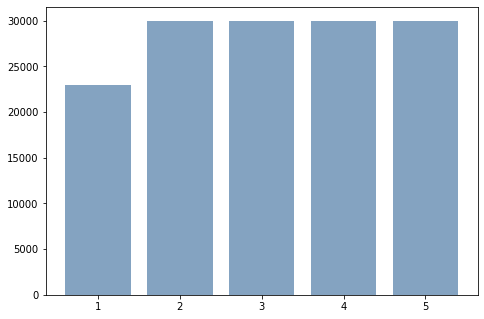

In [23]:
sentence = df['review'].tolist()
label1 = df['sentiment'].tolist()

c = Counter(label1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Intent = []
Occurance = []
for i in c.items():
  Intent.append(i[0])
  Occurance.append(i[1])
ax.bar(Intent,Occurance,color=(0.2, 0.4, 0.6, 0.6))  
plt.show()


# Data Preparation

In [24]:
dic={1:0,2:1,3:2,4:3,5:4}
ans={0:1,1:2,2:3,3:4,4:5}

In [25]:
labels=data['sentiment']
sentence=data['review']

for i in tqdm(range(len(labels))):
  labels[i]=dic[labels[i]]

  0%|          | 0/143000 [00:00<?, ?it/s]<ipython-input-25-785f4b4d167f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i]=dic[labels[i]]
100%|██████████| 143000/143000 [00:32<00:00, 4339.97it/s]


In [26]:
for i in range(len(label1)):
 label1[i]=dic[label1[i]]

data={'sentence':sentence,'label1':labels}
df=pd.DataFrame(data)
print(len(df))
df=df.drop_duplicates()
print(len(df))

143000
142973


In [27]:
X_train, X_test, y_train, y_test = train_test_split(sentence, label1, test_size = 0.20, random_state = 0, stratify=label1)

In [28]:
pd.DataFrame(y_train).value_counts()

1    24000
2    24000
3    24000
4    24000
0    18400
dtype: int64

In [29]:
sentences = X_train
labels = y_train

In [30]:
numClasses = 5
label_1_num_classes = numClasses
label1 = torch.LongTensor(labels)

# Loading RoBERTa Model and Creating Data Frame

In [31]:
print('Loading RoBERTa tokenizer...')
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', do_lower_case=True)

# Print the original sentence.
print(' Original: ', sentences[0])
# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Loading RoBERTa tokenizer...


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

 Original:  he had an english accent which he seemed trying to hide i dont know this but my impression is that europeons now own the wsjengland s a great country but im suspicious of europeon socialism i really cant spell it in particular the brits are proud of their writing ability and rightly so but id rather have americans brainwashing americans bad as that may be
Tokenized:  ['he', 'Ġhad', 'Ġan', 'Ġenglish', 'Ġaccent', 'Ġwhich', 'Ġhe', 'Ġseemed', 'Ġtrying', 'Ġto', 'Ġhide', 'Ġi', 'Ġdont', 'Ġknow', 'Ġthis', 'Ġbut', 'Ġmy', 'Ġimpression', 'Ġis', 'Ġthat', 'Ġeuro', 'pe', 'ons', 'Ġnow', 'Ġown', 'Ġthe', 'Ġw', 's', 'j', 'eng', 'land', 'Ġs', 'Ġa', 'Ġgreat', 'Ġcountry', 'Ġbut', 'Ġim', 'Ġsuspicious', 'Ġof', 'Ġeuro', 'pe', 'on', 'Ġsocialism', 'Ġi', 'Ġreally', 'Ġcant', 'Ġspell', 'Ġit', 'Ġin', 'Ġparticular', 'Ġthe', 'Ġb', 'rit', 's', 'Ġare', 'Ġproud', 'Ġof', 'Ġtheir', 'Ġwriting', 'Ġability', 'Ġand', 'Ġrightly', 'Ġso', 'Ġbut', 'Ġid', 'Ġrather', 'Ġhave', 'Ġameric', 'ans', 'Ġbrain', 'washing', 'Ġame

In [32]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for sent in tqdm(sentences):
    encoded_dict = tokenizer.encode_plus(sent,add_special_tokens = True,max_length = 512,pad_to_max_length = True,
                        return_attention_mask = True, return_tensors = 'pt',)
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
all_labels = torch.stack([label1], dim=1)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

  0%|          | 0/114400 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 114400/114400 [00:52<00:00, 2158.96it/s]


Original:  he had an english accent which he seemed trying to hide i dont know this but my impression is that europeons now own the wsjengland s a great country but im suspicious of europeon socialism i really cant spell it in particular the brits are proud of their writing ability and rightly so but id rather have americans brainwashing americans bad as that may be
Token IDs: tensor([    0,  8585,    16,   117,   169,   939,   115,   120,   963,    19,
         3768,    11,    42,   386,   117,   147,   213,   117,   147,   527,
          141,    64,     5,  2730,  1930,    86,  9072,   102,   790,     8,
         7533,   143,    86,    23,    70,   745,     5,  3768,   114,   939,
        33976,   216,    54,   209,    82,    32,   141,    64,   939,   575,
           99,  2594,     7,   106,   417,  2533,  3844,     5,   418,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,    

In [33]:
dataset = TensorDataset(input_ids, attention_masks, all_labels)

# Create a 90-10 train-validation split.
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

80,080 training samples
34,320 validation samples


# Training on label 1

In [34]:
batch_size = 32
train_dataloader = DataLoader( train_dataset, shuffle=True, batch_size = batch_size)
validation_dataloader = DataLoader( val_dataset, shuffle=False, batch_size = batch_size )


model = RobertaForSequenceClassification.from_pretrained( 
    "roberta-base", num_labels = numClasses, output_attentions = False, output_hidden_states = False)

model.cuda()

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [36]:
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8, weight_decay=0.01)

epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 500, num_training_steps = total_steps)

In [37]:
def flat_accuracy(preds1,labels):
    pred_flat1 = np.argmax(preds1, axis=1).flatten()
    labels = labels.flatten() 
    labels_flat1=np.asarray(labels)
    acc1= np.sum(pred_flat1 == labels_flat1) / len(labels_flat1)
    #return (acc1+acc2)/2
    return acc1

In [38]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [39]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # print(b_labels.shape)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       return_dict=True)
        label1_preds = result["logits"][:, :numClasses]
        label1_loss = torch.nn.functional.cross_entropy(label1_preds, b_labels[:, 0])


        loss = label1_loss

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy1 = 0
    total_eval_accuracy2 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        

            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           return_dict=True)

        label1_preds = result["logits"][:, :label_1_num_classes]
        label1_loss = torch.nn.functional.cross_entropy(label1_preds, b_labels[:, 0])


        loss = label1_loss 
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        label1_preds = label1_preds.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        eval_1 = flat_accuracy(label1_preds,label_ids)
        total_eval_accuracy1+=eval_1

    # Report the final accuracy for this validation run.
    avg_val_accuracy1 = total_eval_accuracy1 / len(validation_dataloader)
    print("  Accuracy1: {0:.2f}".format(avg_val_accuracy1))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur. Label1.': avg_val_accuracy1,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
    path = "epoch_"+str(epoch_i)+"_check.pth"
    torch.save(model.state_dict(), path)
 
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 3 ========
Training...
  Batch    40  of  2,503.    Elapsed: 0:00:31.
  Batch    80  of  2,503.    Elapsed: 0:00:59.
  Batch   120  of  2,503.    Elapsed: 0:01:27.
  Batch   160  of  2,503.    Elapsed: 0:01:55.
  Batch   200  of  2,503.    Elapsed: 0:02:23.
  Batch   240  of  2,503.    Elapsed: 0:02:51.
  Batch   280  of  2,503.    Elapsed: 0:03:19.
  Batch   320  of  2,503.    Elapsed: 0:03:47.
  Batch   360  of  2,503.    Elapsed: 0:04:15.
  Batch   400  of  2,503.    Elapsed: 0:04:43.
  Batch   440  of  2,503.    Elapsed: 0:05:10.
  Batch   480  of  2,503.    Elapsed: 0:05:38.
  Batch   520  of  2,503.    Elapsed: 0:06:06.
  Batch   560  of  2,503.    Elapsed: 0:06:34.
  Batch   600  of  2,503.    Elapsed: 0:07:02.
  Batch   640  of  2,503.    Elapsed: 0:07:30.
  Batch   680  of  2,503.    Elapsed: 0:07:58.
  Batch   720  of  2,503.    Elapsed: 0:08:26.
  Batch   760  of  2,503.    Elapsed: 0:08:54.
  Batch   800  of  2,503.    Elapsed: 0:09:22.
  Batch   840  of

# Calculating testing accuracy.

In [40]:
data={'sentence':X_test,'label':y_test}
df=pd.DataFrame(data, columns =['label','sentence']) 

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

label_1_num_classes = numClasses

# from sklearn.preprocessing import LabelEncoder

# label1_encoder = LabelEncoder()

# label1 = [item[0] for item in labels]
# label1 = label1_encoder.fit_transform(label1)

label1 = torch.LongTensor(labels)

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                sent,add_special_tokens = True,max_length = 512,pad_to_max_length = True, return_attention_mask = True,return_tensors = 'pt',)
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
all_labels = torch.stack([label1], dim=1)

# Set the batch size.  
batch_size = 32  


# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, all_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, shuffle=False, batch_size=batch_size)

Number of test sentences: 28,600



/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [43]:
sentences[0]

'i tried this book on a free basis it just did not suite my style of reading it is worth a quick read'

In [52]:
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))
prediction_list = []
real_list=[]
accuracy1 = 0
total_count = 0
misclassify1=0
misclassify_data=[]
misClassifiedLabel=[]
originalPredictions=[]

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  #logits = result.logits
  label1_preds = result["logits"][:, :label_1_num_classes]

  # Move logits and labels to CPU
  label1_preds = label1_preds.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  label1_preds=np.argmax(label1_preds,axis=1)
  label_ids = label_ids.flatten()

  for i in range(len(label_ids)):
    prediction_list.append(label1_preds[i])
    real_list.append(label_ids[i])
    if(label1_preds[i]==label_ids[i]):
      accuracy1+=1
    else:
      misclassify1+=1
      #for analyzing misclassified data
      misclassify_data.append(sentences[i])
      misClassifiedLabel.append(label1_preds[i])
      originalPredictions.append(label_ids[i])

print("")

print("Number of Label1 correctly predicted: "+str(accuracy1))
print("Number of Label1 misclassify: "+str(misclassify1))

print("Label1 Testing Accuracy: {:.2f}".format(accuracy1/(accuracy1+misclassify1) ) )
bert_singlelabel_accuracy1 = accuracy1/(accuracy1+misclassify1)

Predicting labels for 28,600 test sentences...

Number of Label1 correctly predicted: 18083
Number of Label1 misclassify: 10517
Label1 Testing Accuracy: 0.63


In [53]:
miclassifyDF = pd.DataFrame({'reviews':misclassify_data,'labelsPred':misClassifiedLabel,'labelsOriginal':originalPredictions})
miclassifyDF

,reviews,labelsPred,labelsOriginal
0,i tried this book on a free basis it just did ...,2,1
1,yes the book is only 99c but it doesnt excuse ...,2,1
2,under heaventhis is the third book from mr gre...,4,3
3,i began reading through this book and found qu...,1,2
4,this is a great resource with many classic rec...,1,3
...,...,...,...
10512,i began reading through this book and found qu...,3,2
10513,this didnt work out for me i think that i just...,2,3
10514,1st play ive ever read and it was okay the for...,1,0
10515,as much as i enjoyed rachel thompsons snarking...,1,2


In [54]:
miclassifyDF.to_csv('misclassifiedRoBERTaKindle5Classes.csv')

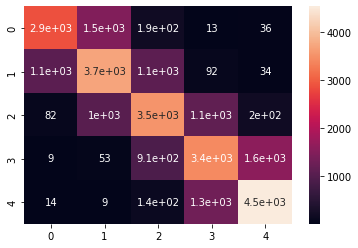

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(real_list,prediction_list), annot=True)